In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt

In [2]:
def foo(i, j):
    return ((i+1)/(j+1))**(1/3) + ((j+1)/(i+1))**(1/3)

M = 8192
N = 8192

r = 2
p = 8

A = np.fromfunction(foo, [M, N])

A.shape

(8192, 8192)

In [6]:
def rsvd(Ma, r, p, random_generator = np.random.randn, random_state=42):
    M, N = Ma.shape
    np.random.seed(random_state)
    sketch = random_generator(N, r + p)
    Q, R = np.linalg.qr(Ma @ sketch)
    Ur, sr, Vr = np.linalg.svd(Q.T @ A, full_matrices=False)
    Ur = Q @ Ur
    return Ur[:, :r], sr[:r], Vr[:r, :]

In [7]:
start = time.time()
u, s, v = np.linalg.svd(A, full_matrices=False)
end = time.time()
print("Classical time: ", end - start, " sec")

start = time.time()
Ur, sr, Vr = rsvd(A, r, p)
end = time.time()
print("RSVD time: ", end - start, "sec")

ut = u[:, :r]
st = s[:r]
vt = v[:r, :]


print("Relative error of sigma: ", np.linalg.norm(sr - st) / st[0])
print("Relative approximation error: ", np.linalg.norm(np.dot(Ur * sr, Vr) - A) / np.linalg.norm(A))
print("Initial capacity: ", A.size)
print("Store size: ", Ur.size + sr.size + Vr.size)


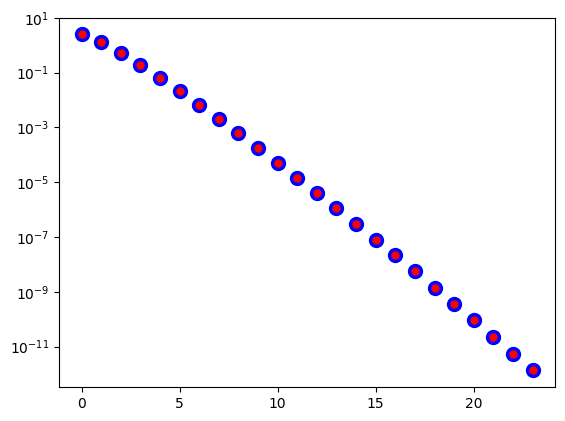

In [112]:
plt.plot(sr, 'bo', markersize=10)
plt.plot(st, 'ro', markersize=5)
plt.yscale('log')
plt.show()